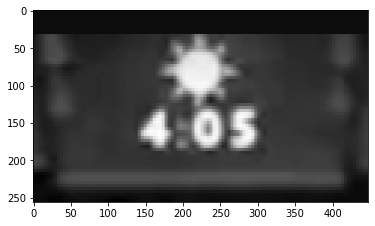

In [1]:
import cv2
import matplotlib.pyplot as plt
from functools import partial

# numpy ndarray
img = cv2.imread('../videos/4-05.png', cv2.IMREAD_GRAYSCALE)

pipeline = [
    partial(cv2.resize, dsize=None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
]
for transform in pipeline:
    img = transform(src=img)

# do not use cv2.imshow()
plt.imshow(img, cmap='Greys_r')
plt.show()

In [25]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
# inference
model_version = "microsoft/trocr-base-printed"
processor = TrOCRProcessor.from_pretrained(model_version)
model = VisionEncoderDecoderModel.from_pretrained(model_version)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from functools import partial

import logging, sys
logging.disable(sys.maxsize)

FRAMES_DIR = Path('../videos/frames-2/')
samples = np.random.choice(os.listdir(FRAMES_DIR), 10)
samples = sorted(samples)

for i, file in enumerate(samples):
    if file == '.DS_Store':
        continue
    
    path = FRAMES_DIR / file
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = file.replace('.bmp', '')
    
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(img)
    # plt.title(label)
    plt.show()
    
    # CROP
    # img = img[16:23, 629:651]
    img = img[16:23, 619:653]
    pipeline = [
        partial(cv2.resize, dsize=None, fx=16, fy=16, interpolation=cv2.INTER_CUBIC)
    ]
    for transform in pipeline:
        img = transform(src=img)
        
    # fig, ax = plt.subplots(figsize=(15, 15))
    # ax.imshow(img)
    # plt.show()
    
    # OCR
    image = Image.fromarray(img)
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # print(''.join([c for c in generated_text if c.isdigit()]) == label.replace('-', ''))
    print('Recognized:', generated_text, 'File:', file)

Recognized: 2835 File: 1091.bmp
Recognized: 8.43 File: 110.bmp
Recognized: 29.28 File: 1129.bmp
Recognized: 20.10 File: 282.bmp
Recognized: 2338 File: 378.bmp
Recognized: 26.59 File: 482.bmp
Recognized: 32.55 File: 516.bmp
Recognized: 3331 File: 535.bmp
Recognized: 7.51 File: 728.bmp
Recognized: 8.06 File: 743.bmp


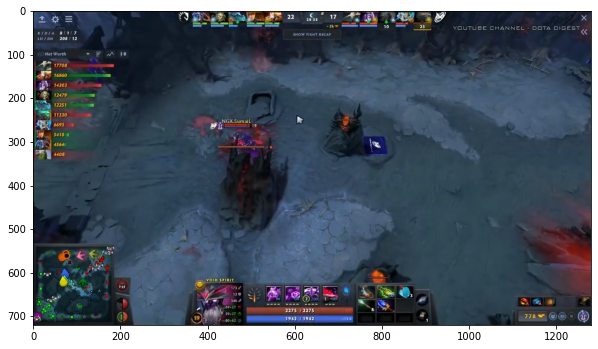

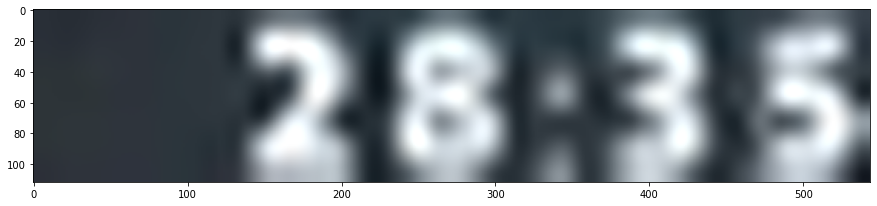

In [35]:
path = FRAMES_DIR / '1091.bmp'
img = cv2.imread(str(path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
label = file.replace('.bmp', '')

fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
# plt.title(label)
plt.show()

img = img[16:23, 619:653]
pipeline = [
    partial(cv2.resize, dsize=None, fx=16, fy=16, interpolation=cv2.INTER_CUBIC)
]
for transform in pipeline:
    img = transform(src=img)
    
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)
plt.show()